In [1]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn

import matplotlib.pylab as plt

In [2]:
IMAGE_SIZE = 28

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

# Download and load data set
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=composed)
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=composed)

In [3]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y='+str(data_sample[1]))

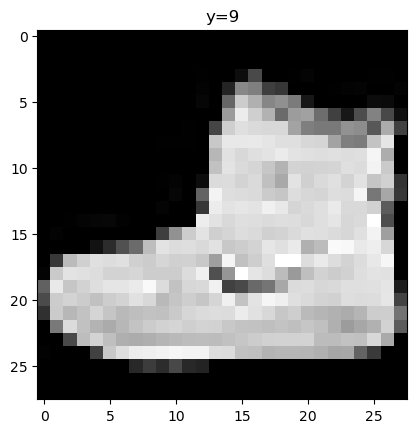

In [4]:
show_data(trainset[0])

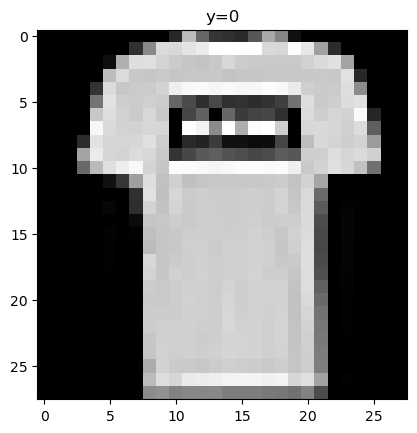

In [5]:
show_data(trainset[1])

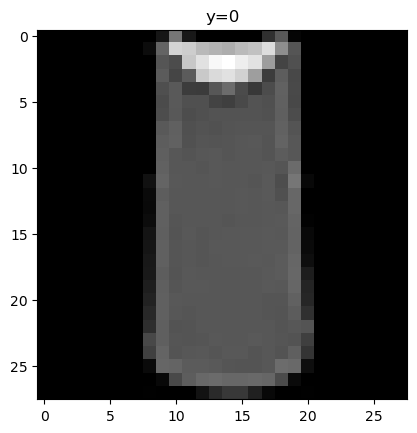

In [6]:
show_data(trainset[2])

In [7]:
# Sequential Model

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # Conv 1
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # Conv 2
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # Fully Connected
        self.fc = torch.nn.Linear(7*7*64, 10, bias=True)
        
        # Weight Reset only for fc
        torch.nn.init.xavier_uniform_(self.fc.weight)
        
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # Flattern
        out = self.fc(out)
        
        return out

In [8]:
model = CNN()

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=testset, batch_size=5120, shuffle=True)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9)

n_epochs = 10
cost_list = []
accuracy_list = []

N_test = len(testset)
COST = 0

In [10]:
def train_model(n_epochs):
    for epoch in range(n_epochs):
        
        COST = 0
        
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
            COST += loss.data
            
        cost_list.append(COST)
        
        
        correct=0
        
        # prediction
        for x_test, y_test in test_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
            
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
        
        print("accuracy =", accuracy)
        print("epoch=", epoch)

In [11]:
train_model(10)

accuracy = 0.861
epoch= 0
accuracy = 0.8891
epoch= 1
accuracy = 0.8917
epoch= 2
accuracy = 0.8979
epoch= 3
accuracy = 0.8951
epoch= 4
accuracy = 0.9001
epoch= 5
accuracy = 0.8995
epoch= 6
accuracy = 0.9011
epoch= 7
accuracy = 0.9019
epoch= 8
accuracy = 0.9047
epoch= 9


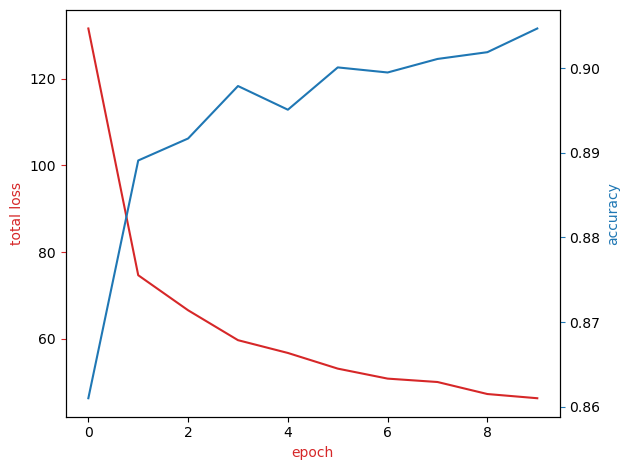

In [12]:
# plot

fig, ax1 = plt.subplots()
color ='tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()